In [1]:
import tensorflow as tf
import os
import random
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
seed = 42
np.random.seed = seed

In [3]:
img_width=256
img_height=256
img_channels=3

In [7]:
train_path="C:/Users/sahit/Downloads/data-science-bowl-2018/stage1_train/"
test_path="C:/Users/sahit/Downloads/data-science-bowl-2018/stage1_test/"
train_ids= next(os.walk(train_path))[1]
test_ids= next(os.walk(test_path))[1]

In [8]:
X_train=np.zeros((len(train_ids), img_height, img_width, img_channels), dtype=np.uint8)
Y_train=np.zeros((len(train_ids), img_height, img_width, 1), dtype=bool)

In [10]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = os.path.join(train_path, id_)
    
    img = imread(os.path.join(path, 'images', id_ + '.png'))[:,:,:img_channels]  
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_train[n] = img
    
    mask = np.zeros((img_height, img_width, 1), dtype=bool)
    for mask_file in next(os.walk(os.path.join(path, 'masks/')))[2]:
        mask_ = imread(os.path.join(path, 'masks', mask_file))
        mask_ = np.expand_dims(resize(mask_, (img_height, img_width), mode='constant', preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    
    Y_train[n] = mask

Resizing training images and masks


100%|██████████████████████████████████████████████████████████████████████████████| 670/670 [1:02:14<00:00,  5.57s/it]


In [11]:
X_test = np.zeros((len(test_ids), img_height, img_width, img_channels), dtype=np.uint8)
sizes_test = []
print('Resizing test images')

for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = os.path.join(test_path, id_)
    img = imread(os.path.join(path, 'images', id_ + '.png'))[:,:,:img_channels]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')


Resizing test images


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:07<00:00,  8.73it/s]

Done!


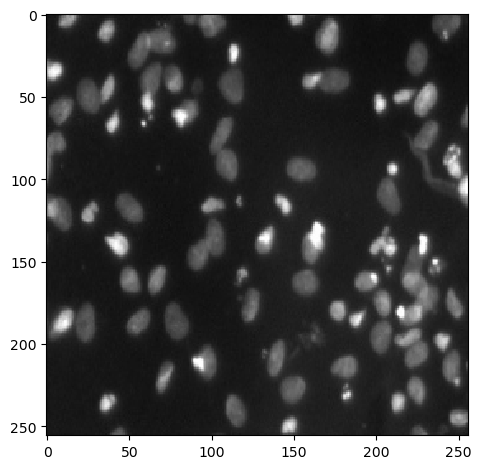

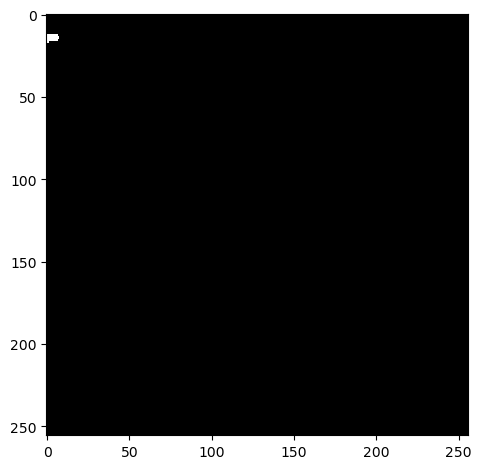

In [12]:
image_x=random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [13]:
inputs=tf.keras.layers.Input((img_width,img_height,img_channels))
s=tf.keras.layers.Lambda(lambda x:x /255)(inputs)

In [14]:
c1=tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal',padding='same')(inputs)
c1=tf.keras.layers.Dropout(0.1)(c1)
c1=tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal',padding='same')(inputs)
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [15]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 16, 16, 128)       │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 16, 16, 256)       │         295,16

 Total params: 1,938,785 (7.40 MB)

 Trainable params: 1,938,785 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
checkpointer=tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5.keras',verbose=1, save_best_only=True)
callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]
results=model.fit(X_train,Y_train,validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

model.save('model_for_nuclei.h5.keras')

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.6972 - loss: 5.3642 - val_accuracy: 0.8448 - val_loss: 0.6183
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.7921 - loss: 0.5634 - val_accuracy: 0.8801 - val_loss: 0.2520
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.8698 - loss: 0.3108 - val_accuracy: 0.9232 - val_loss: 0.1897
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.9059 - loss: 0.2307 - val_accuracy: 0.9251 - val_loss: 0.1851
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.9146 - loss: 0.2148 - val_accuracy: 0.9461 - val_loss: 0.1414
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.9342 - loss: 0.1694 - val_accuracy: 0.8955 - val_loss: 0.2392
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8998 - loss: 0.2279 - val_accuracy: 0.9527 - val_loss: 0.1215
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.9407 - loss: 0.1501 - val_accuracy: 0.9584 - v

In [17]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 917ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 890ms/step


In [19]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

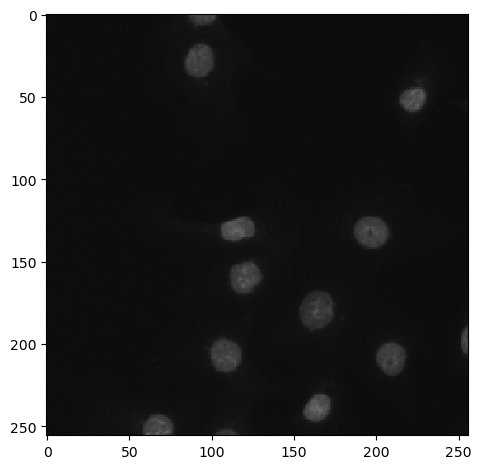

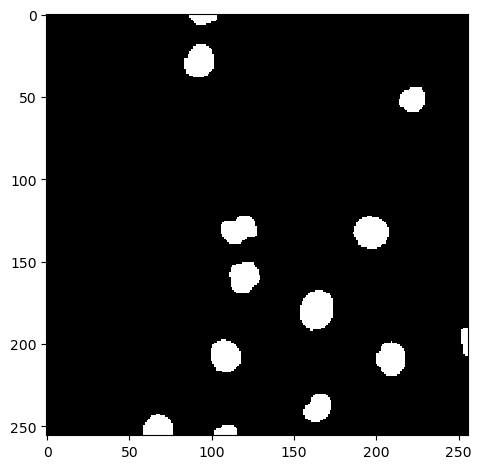

C:\ProgramData\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


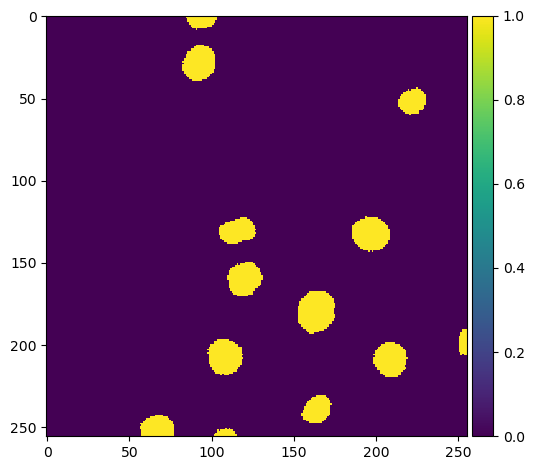

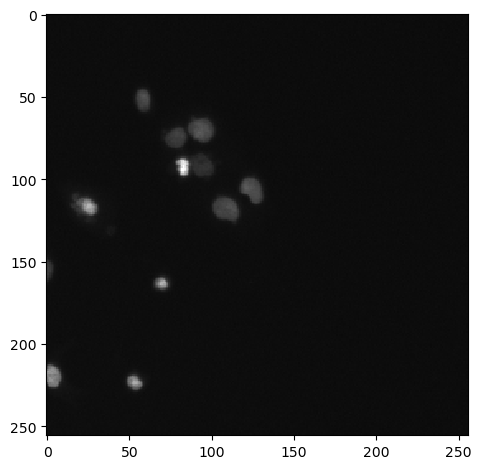

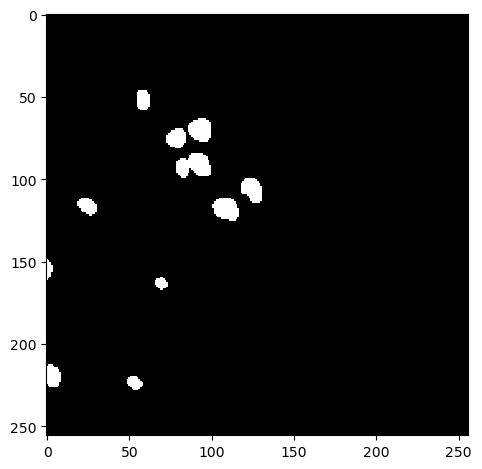

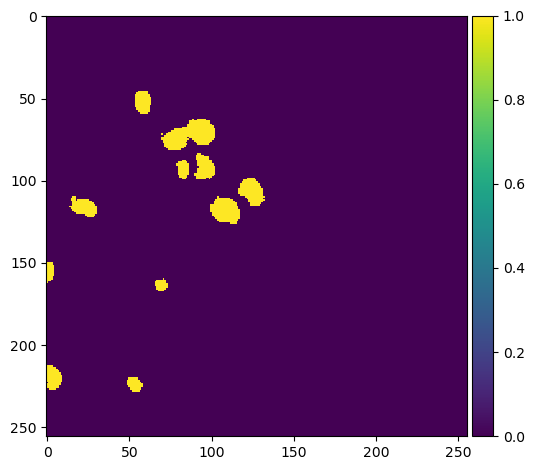

In [20]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()